In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df3 = pd.read_csv(r"C:\Users\athar\OneDrive\Desktop\Practical\DSPrac\Datasets\adult.csv")
df3

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [21]:
df3.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [22]:
df3.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

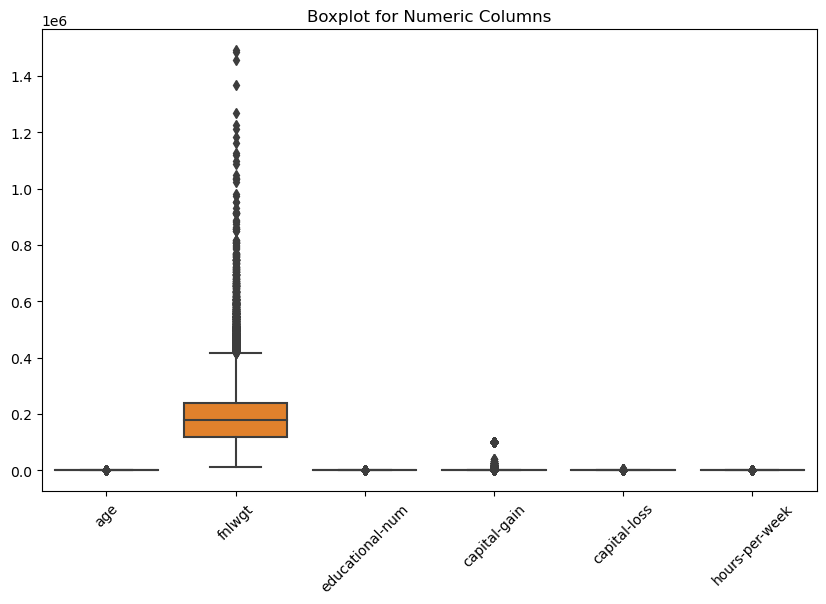

In [6]:
numeric_columns=['age',	'fnlwgt',	'educational-num',	'capital-gain',	'capital-loss',	'hours-per-week']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df3[numeric_columns])
plt.xticks(rotation=45)
plt.title('Boxplot for Numeric Columns')
plt.show()

In [7]:
Q1 = df3[numeric_columns].quantile(0.25)
Q3 = df3[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_mask = (df3[numeric_columns] < lower_bound) | (df3[numeric_columns] > upper_bound)

df3_no_outliers = df3[~outlier_mask.any(axis=1)]

print("Dataset before outlier removal:", df3.shape)
print("Dataset after outlier removal:", df3_no_outliers.shape)

Dataset before outlier removal: (48842, 15)
Dataset after outlier removal: (28558, 15)


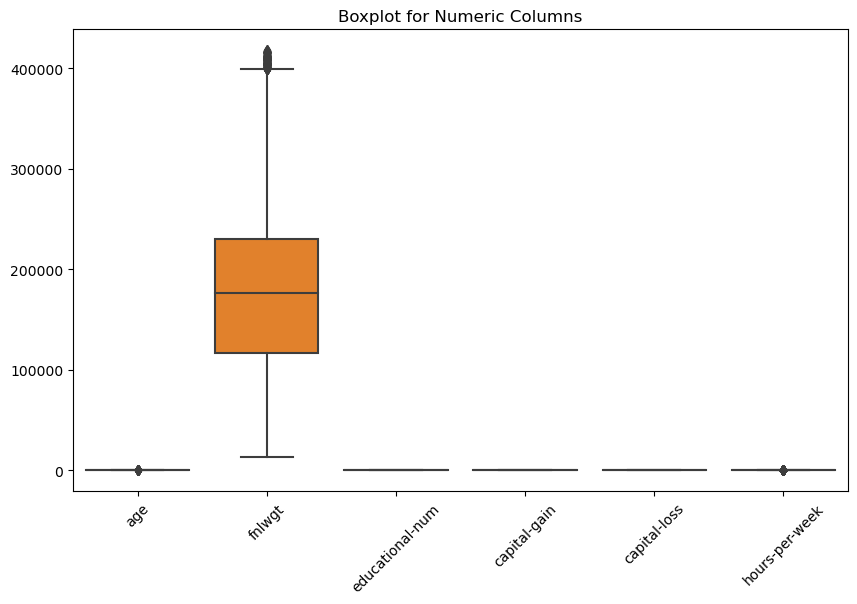

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df3_no_outliers[numeric_columns])
plt.xticks(rotation=45)
plt.title('Boxplot for Numeric Columns')
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler

numeric_columns=['age',	'fnlwgt',	'educational-num',	'capital-gain',	'capital-loss',	'hours-per-week']
scaler = MinMaxScaler()
df3[numeric_columns] = scaler.fit_transform(df3[numeric_columns])
df3[numeric_columns].head() 

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,0.109589,0.145129,0.400000,0.000000,0.0,0.397959
1,0.287671,0.052451,0.533333,0.000000,0.0,0.500000
2,0.150685,0.219649,0.733333,0.000000,0.0,0.397959
3,0.369863,0.100153,0.600000,0.076881,0.0,0.397959
4,0.013699,0.061708,0.600000,0.000000,0.0,0.295918


In [23]:
df3["age"].mean()

38.64358543876172

In [24]:
df3["age"].median()

37.0

In [25]:
df3["age"].mode()

0    36
Name: age, dtype: int64

In [26]:
df3["age"].std()

13.71050993444322

In [27]:
df3["age"].min()

17

In [28]:
df3["age"].max()

90

In [29]:
df3.groupby("income")["age"].mean()

income
<=50K    36.872184
>50K     44.275178
Name: age, dtype: float64

In [30]:
df3.groupby("income")["age"].median()

income
<=50K    34.0
>50K     43.0
Name: age, dtype: float64

In [31]:
df3.groupby("income")["age"].std()

income
<=50K    14.104118
>50K     10.558983
Name: age, dtype: float64

In [33]:
df3.groupby("income")["age"].max()

income
<=50K    90
>50K     90
Name: age, dtype: int64

In [34]:
df3.groupby("income")["age"].min()

income
<=50K    17
>50K     19
Name: age, dtype: int64